<a href="https://colab.research.google.com/github/Abhirup2017/MLnow_2.0/blob/main/03_LinearRegression/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 6, 2021


**Author**:
 Shivani Shimpi 

**Reach out**:
[Email](https://www.google.com/intl/en-GB/gmail/about/#) | [GitHub](https://github.com/shivanishimpi) | [LinkedIn](https://www.linkedin.com/in/shivani-shimpi-5113a8170/)

[[Course Repository](https://github.com/shivanishimpi/MLnow_2.0)]

Feel free to check out my [website](http://shivanishimpi.github.io/) for more information

## Setup

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
cd '/content/sample_data'

/content/sample_data


In [19]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [20]:
import os

In [21]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [22]:
mathData = pd.read_csv('/content/student-mat.csv', sep=';') #load the csv file as dataframe

In [23]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [24]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [25]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [26]:
ls

anscombe.json*                mnist_test.csv         univariate_MathData_2.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


## Data visualization

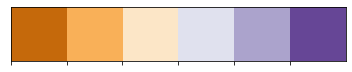

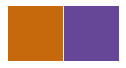

In [27]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [28]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

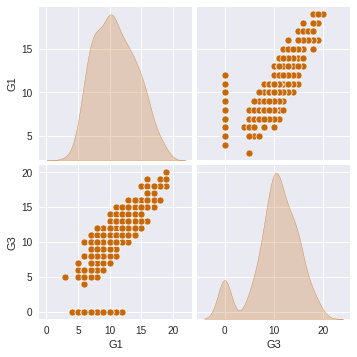

In [29]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [30]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [31]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [32]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [33]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [34]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [35]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [36]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [37]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 1s 19ms/step - loss: 4.8245 - mae: 4.8245 - mse: 26.2589 - val_loss: 4.7726 - val_mae: 4.7726 - val_mse: 25.2244
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 4.7258 - mae: 4.7258 - mse: 25.2637 - val_loss: 4.6629 - val_mae: 4.6629 - val_mse: 24.1158
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 4.6246 - mae: 4.6246 - mse: 24.2630 - val_loss: 4.5546 - val_mae: 4.5546 - val_mse: 23.0536
Epoch 4/300
10/10 [==============================] - 0s 3ms/step - loss: 4.5264 - mae: 4.5264 - mse: 23.3377 - val_loss: 4.4460 - val_mae: 4.4460 - val_mse: 22.0109
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 4.4244 - mae: 4.4244 - mse: 22.3767 - val_loss: 4.3405 - val_mae: 4.3405 - val_mse: 21.0185
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 4.3264 - mae: 4.3264 - mse: 21.5045 - val_loss: 4.2328 - val_mae: 4.2328 - val_mse: 20.0390
Epoch 7/3

In [38]:
print(history)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


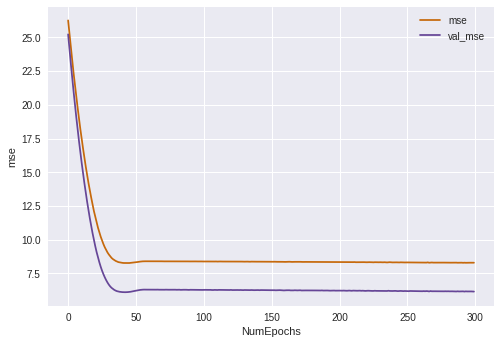

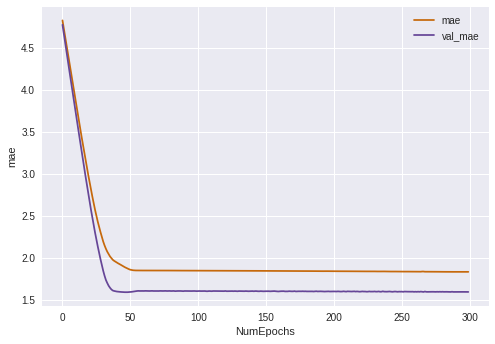

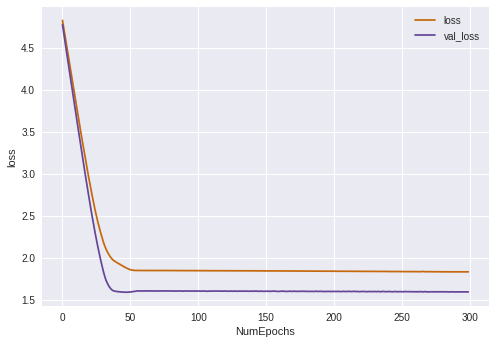

In [40]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [41]:
model.predict([1])

array([[1.008625]], dtype=float32)

In [42]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[1.008625]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[1.008625 ]
 [2.0069652]
 [3.0053055]
 [4.0036454]
 [5.001986 ]]

List of Predictions (flattened out):
[1.008625  2.0069652 3.0053055 4.0036454 5.001986 ]



In [43]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [44]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [45]:
print(len(testPreds))
print(testPreds)

79
[13.987047   6.000326  10.992026  16.982067  16.982067  11.990367
 13.987047  18.978748  18.978748   7.9970064 13.987047  12.988707
  7.9970064  6.9986663  8.995346  12.988707  10.992026  15.983727
  6.9986663  9.993687  14.985387  12.988707  13.987047  15.983727
  6.9986663  6.9986663  7.9970064  9.993687  11.990367   9.993687
 11.990367  12.988707   9.993687   6.000326   8.995346  11.990367
  6.9986663  7.9970064 13.987047   8.995346   8.995346   6.9986663
 11.990367   6.000326  12.988707   6.9986663  6.9986663 10.992026
 12.988707  16.982067  11.990367  14.985387   8.995346  11.990367
 14.985387  11.990367  14.985387  11.990367  14.985387  10.992026
 11.990367   7.9970064 15.983727   6.9986663 15.983727  10.992026
 15.983727  12.988707   7.9970064  7.9970064 11.990367  17.980408
 12.988707  15.983727   9.993687   6.9986663  9.993687   6.9986663
 10.992026 ]


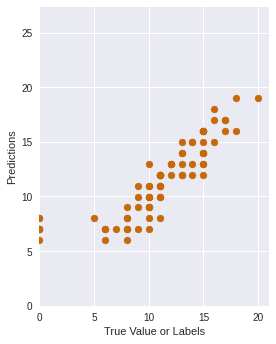

In [46]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

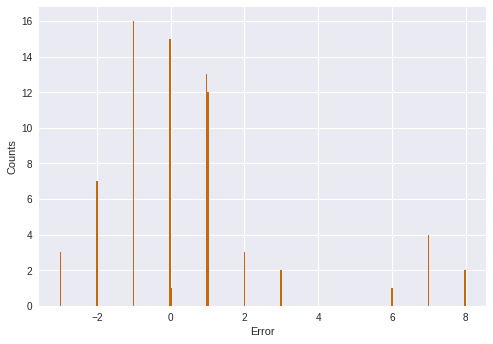

In [47]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions